# **Daibetes Prediction**
Importing dependency

In [30]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# **Add Data**


In [31]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [32]:
pd.read_csv?

Signature:
pd.read_csv(
    filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
    *,
    sep: 'str | None | lib.NoDefault' = <no_default>,
    delimiter: 'str | None | lib.NoDefault' = None,
    header: "int | Sequence[int] | None | Literal['infer']" = 'infer',
    names: 'Sequence[Hashable] | None | lib.NoDefault' = <no_default>,
    index_col: 'IndexLabel | Literal[False] | None' = None,
    usecols: 'UsecolsArgType' = None,
    dtype: 'DtypeArg | None' = None,
    engine: 'CSVEngine | None' = None,
    converters: 'Mapping[Hashable, Callable] | None' = None,
    true_values: 'list | None' = None,
    false_values: 'list | None' = None,
    skipinitialspace: 'bool' = False,
    skiprows: 'list[int] | int | Callable[[Hashable], bool] | None' = None,
    skipfooter: 'int' = 0,
    nrows: 'int | None' = None,
    na_values: 'Hashable | Iterable[Hashable] | Mapping[Hashable, Iterable[Hashable]] | None' = None,
    keep_default_na: 'bool' = True,
    na_filter: '

In [33]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [35]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [36]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

* O -> Non Diabetes
* 1 -> Diabetes

In [37]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


# Replace zero value with median value

In [38]:
# Replace zero values with median for specific columns
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zero:
    median = diabetes_dataset[col].median()
    diabetes_dataset[col] = diabetes_dataset[col].replace(0, median)

In [39]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [40]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [41]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Data Standardization

In [42]:
scaler = StandardScaler()

In [43]:
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [44]:
standardized_data = scaler.transform(X)

In [45]:
print(standardized_data)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]


In [46]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [47]:
print(X)
print(Y)

[[ 0.63994726  0.86604475 -0.03198993 ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20506583 -0.5283186  ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01666174 -0.69376149 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02157407 -0.03198993 ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14279979 -1.02464727 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94206766 -0.19743282 ... -0.29849289 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Train Test Split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [49]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# Training the Model

In [50]:
classifier = svm.SVC(kernel='linear')

In [51]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# **Model Evaluation**
## Accuracy Score

In [52]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [53]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7801302931596091


In [54]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [55]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


# Import New Models

In [56]:
# Import the required models
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Train All Models

In [58]:
# If not already imported, install metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Train all classifiers
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, Y_train)

rf_classifier = RandomForestClassifier(random_state=2)
rf_classifier.fit(X_train, Y_train)

lr_classifier = LogisticRegression(max_iter=1000, random_state=2)
lr_classifier.fit(X_train, Y_train)

dt_classifier = DecisionTreeClassifier(random_state=2)
dt_classifier.fit(X_train, Y_train)

# SVM
svm_pred = svm_classifier.predict(X_test)
svm_precision = precision_score(Y_test, svm_pred)
svm_recall = recall_score(Y_test, svm_pred)
svm_f1 = f1_score(Y_test, svm_pred)

# Random Forest
rf_pred = rf_classifier.predict(X_test)
rf_precision = precision_score(Y_test, rf_pred)
rf_recall = recall_score(Y_test, rf_pred)
rf_f1 = f1_score(Y_test, rf_pred)

# Logistic Regression
lr_pred = lr_classifier.predict(X_test)
lr_precision = precision_score(Y_test, lr_pred)
lr_recall = recall_score(Y_test, lr_pred)
lr_f1 = f1_score(Y_test, lr_pred)

# Decision Tree
dt_pred = dt_classifier.predict(X_test)
dt_precision = precision_score(Y_test, dt_pred)
dt_recall = recall_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred)

#  Calculate Accuracy

In [59]:
# SVM
svm_train_acc = accuracy_score(svm_classifier.predict(X_train), Y_train)
svm_test_acc = accuracy_score(svm_classifier.predict(X_test), Y_test)

# Random Forest
rf_train_acc = accuracy_score(rf_classifier.predict(X_train), Y_train)
rf_test_acc = accuracy_score(rf_classifier.predict(X_test), Y_test)

# Logistic Regression
lr_train_acc = accuracy_score(lr_classifier.predict(X_train), Y_train)
lr_test_acc = accuracy_score(lr_classifier.predict(X_test), Y_test)

# Decision Tree
dt_train_acc = accuracy_score(dt_classifier.predict(X_train), Y_train)
dt_test_acc = accuracy_score(dt_classifier.predict(X_test), Y_test)


In [60]:
# Show accuracy of all models

print("Model Accuracies:\n")
print(f"SVM Train Accuracy: {svm_train_acc:.4f}")
print(f"SVM Test Accuracy: {svm_test_acc:.4f}\n")
print(f"Random Forest Train Accuracy: {rf_train_acc:.4f}")
print(f"Random Forest Test Accuracy: {rf_test_acc:.4f}\n")
print(f"Logistic Regression Train Accuracy: {lr_train_acc:.4f}")
print(f"Logistic Regression Test Accuracy: {lr_test_acc:.4f}\n")
print(f"Decision Tree Train Accuracy: {dt_train_acc:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_acc:.4f}")



Model Accuracies:

SVM Train Accuracy: 0.7801
SVM Test Accuracy: 0.7727

Random Forest Train Accuracy: 1.0000
Random Forest Test Accuracy: 0.7403

Logistic Regression Train Accuracy: 0.7866
Logistic Regression Test Accuracy: 0.7532

Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy: 0.6948


# Visualize with Matplotlib

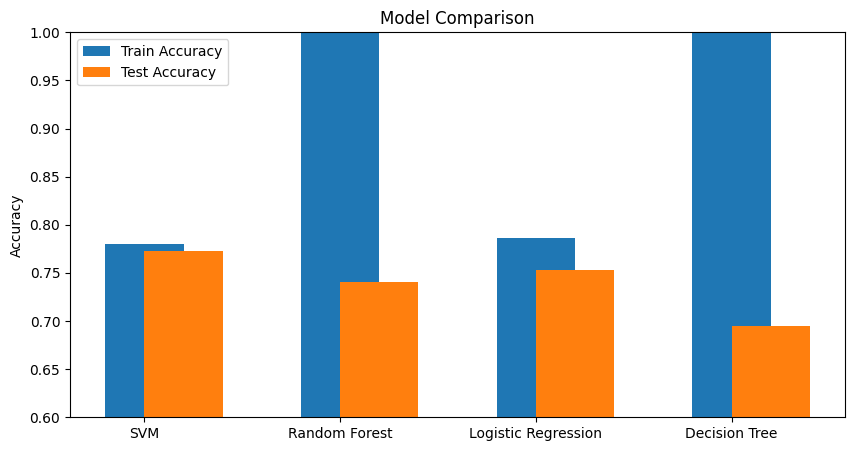

In [61]:
import matplotlib.pyplot as plt

models = ['SVM', 'Random Forest', 'Logistic Regression', 'Decision Tree']
train_accuracies = [svm_train_acc, rf_train_acc, lr_train_acc, dt_train_acc]
test_accuracies = [svm_test_acc, rf_test_acc, lr_test_acc, dt_test_acc]

import matplotlib.pyplot as plt
x = range(len(models))
plt.figure(figsize=(10,5))
plt.bar(x, train_accuracies, width=0.4, label='Train Accuracy', align='center')
plt.bar(x, test_accuracies, width=0.4, label='Test Accuracy', align='edge')
plt.xticks(x, models)
plt.ylim(0.6, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.legend()
plt.show()

## Making a Predictive System

In [62]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# Convert input data to numpy array and reshape for prediction
input_array = np.asarray(input_data).reshape(1, -1)

# Standardize the input data
std_input = scaler.transform(input_array)

# Make prediction
prediction = classifier.predict(std_input)[0]

result = 'diabetic' if prediction == 1 else 'not diabetic'
print(f'The person is {result}.')


The person is diabetic.


C:\Users\user\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Model Export

In [63]:
import joblib

# Save the scaler and model
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(classifier, 'diabetes_model.pkl')


['diabetes_model.pkl']